# Linear Regression project to predict yearly amount of time spent by the user 



# import the libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# let's check for some basic information about the dataset

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# Dataset does not any have null values

# checking the correlation between variables w.r.t target variable

In [12]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

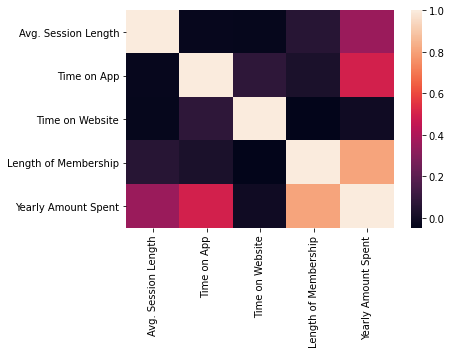

In [13]:
sns.heatmap(customers.corr())

# we see that 'Avg. Session Length','Time on App' and 'Length of Membership' are correlating good with 'Yearly spent time'

# Let's drop some unwanted columns form the dataframe

In [16]:
customers = customers.drop(['Email','Address','Avatar'],axis = 1)

In [18]:
customers.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


# Exploratory data analysis

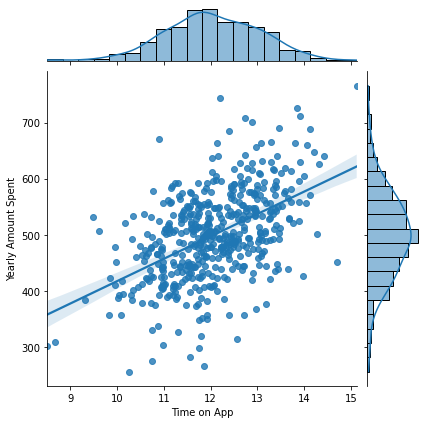

In [19]:
sns.jointplot(x = 'Time on App',y = 'Yearly Amount Spent',data=customers, kind = 'reg')

# From the above figure, we can see the data is normally distibuted with few outliers which can be neglected

# Also, we see a positive correlation between dependent('Time on App') and independent('Yearly spent time') variable

In [21]:
# let's check the same with 'Time on website'

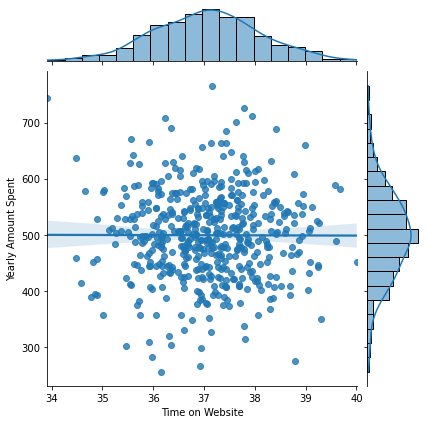

In [22]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent',data=customers, kind = 'reg')

# We can see in the above figure, the data points are scattered uniformly with hardly any correlation between x and y

# Draw some linear model plots for more clearity

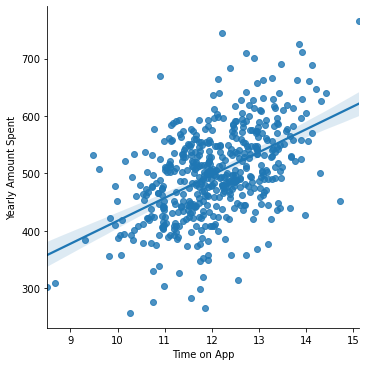

In [23]:
sns.lmplot(x = 'Time on App', y = 'Yearly Amount Spent',data=customers)

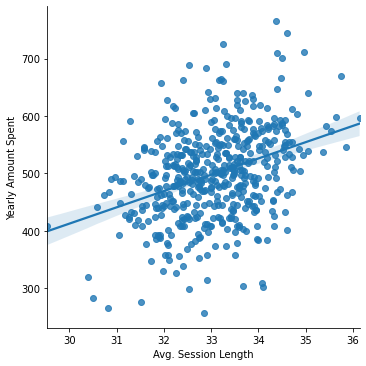

In [24]:
sns.lmplot(x = 'Avg. Session Length', y = 'Yearly Amount Spent',data=customers)

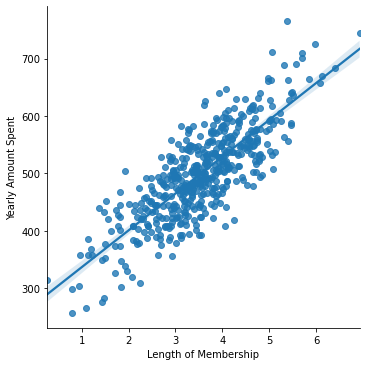

In [25]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent',data=customers)

# Selecting Dependent and Independent variables

In [27]:
X = customers.iloc[:,:-1]

X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [28]:
y = customers.iloc[:,-1]

y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

# Splitting the X and y into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [33]:
X_train.shape

(350, 4)

In [34]:
X_test.shape

(150, 4)

In [35]:
from sklearn.preprocessing import StandardScaler

# We are using standard scaler to scale down the values

In [84]:
scaler = StandardScaler()

In [85]:
X_train = scaler.fit_transform(X_train)

In [86]:
X_test = scaler.transform(X_test)

# Model building

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
regressor = LinearRegression()

In [89]:
regressor

LinearRegression()

In [90]:
regressor.fit(X_train,y_train)

LinearRegression()

# Lets check for underfitting and overfitting 

In [91]:
regressor.score(X_train,y_train)

0.9854085989105928

In [92]:
regressor.score(X_test,y_test)

0.9808757641125856

# We are getting good and almost identical results from both training and testing results.

# The model is neither underfit nor overfit, we are good to go.

In [93]:
prediction = regressor.predict(X_test)

prediction

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

# Lets check accuracy of the model

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [106]:
mae = mean_absolute_error(y_test,prediction)

mae

8.426091641432093

In [107]:
r2_score(y_test,prediction)

0.9808757641125856

In [110]:
mse = mean_squared_error(y_test, prediction)

mse

103.91554136503315

In [111]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [112]:
regressor.coef_

array([25.46811442, 38.74324339,  0.46854792, 63.35347072])

# Lets check if the predicted values are closer to the actual values with scatter plot

Text(0, 0.5, 'prediction')

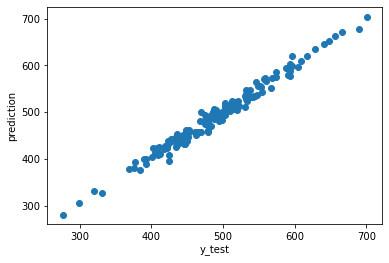

In [114]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('prediction')

# Looks like model is performing good

# Let's check for residuals

In [116]:
# Residuals == errors

residuals = y_test - prediction

residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

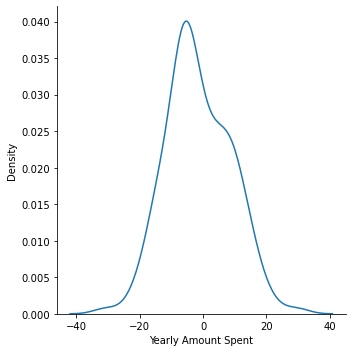

In [117]:
## now, plotting the residuals

sns.displot(residuals, kind = 'kde')

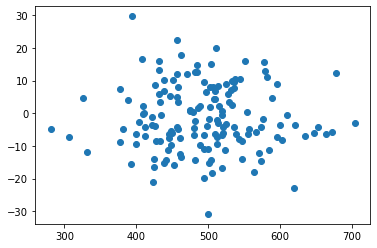

In [118]:
plt.scatter(prediction, residuals)

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

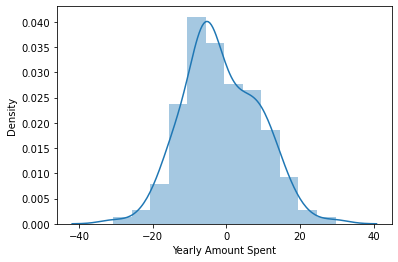

In [119]:
sns.distplot((y_test-prediction))

In [120]:
pd.DataFrame(regressor.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.468114
Time on App,38.743243
Time on Website,0.468548
Length of Membership,63.353471


# Yearly amount spent depends on below features as per the order -
## Ascending = False

- Length of Membership
- Time on App
- Average Session Length
- Time on Website